<a href="https://colab.research.google.com/github/RafkatDolkun/FinalProject/blob/main/Final_Dolkun_Rafkat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [ ]:
# According to the World Health Oranization, cardiovascular diseases (CVDs) are the number 1 cause of death globally.
# This includes: Coronary heart disease, cerebrovascular disease, peripheral arterial disease, and many more. 
# There are many behavioural risk factors that can lead to heart disease such as unhealthy diet, being inactive, using tobacco, or alchol.
# Individuals with prestablished dieases such as hypertension, diabetes, hyperlipidaemia have an increased risk of getting CVD. 
# It is very important to catch CVD as early as possible and help manage it using medication and lifestyle changes
# This is why I will be exploring this data set and creating a ML model to help identify those with risk and potentially save lives.  

In [131]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [190]:
# I will be using the Framingham Heart Disease data
# Reading the CSV file
df = pd.read_csv("framingham_heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [191]:
# Figure out the rows and columns for the data frame
df.shape

(4238, 16)

In [192]:
# check to see if there are any missing values from the dataset (I noticed NA values when looking at it in Excel)
df.isnull().sum()
# education, cigsPerDay, BPMeds, totChol, BMI, heartRate, and glucose have null values
# Glucose has the most with 388

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [193]:
# Need to decide whether to drop these values or to use another method such as replacing them with the average
# After researching, I have decided it will be better to replace the NaNs with mean
df['education'] = df['education'].replace(np.nan,df['education'].mean())
df['cigsPerDay'] = df['cigsPerDay'].replace(np.nan,df['cigsPerDay'].mean())
df['BPMeds'] = df['BPMeds'].replace(np.nan,df['BPMeds'].mean())
df['totChol'] = df['totChol'].replace(np.nan,df['totChol'].mean())
df['BMI'] = df['BMI'].replace(np.nan,df['BMI'].mean())
df['heartRate'] = df['heartRate'].replace(np.nan,df['heartRate'].mean())
df['glucose'] = df['glucose'].replace(np.nan,df['glucose'].mean())

In [194]:
# check to see if it replaced all NaN
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [195]:
# Get summary of each column
df.describe()

# I personally noticed that a majority of the sample do not have diabetes. I first noticed the average blood glucose of about 82, and then noticed that average diabetes is 2.6% of the total.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [162]:
# correlation matrix for the data
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017126,0.197596,0.316807,-0.052204,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.163613,-0.213748,-0.192366,0.121980,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
education,0.017126,-0.163613,1.000000,0.018301,0.007962,-0.010607,-0.035110,-0.080993,-0.038146,-0.022507,-0.128260,-0.061755,-0.135635,-0.053626,-0.033721,-0.053384
currentSmoker,0.197596,-0.213748,0.018301,1.000000,0.766970,-0.048632,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.316807,-0.192366,0.007962,0.766970,1.000000,-0.045826,-0.032706,-0.065947,-0.037063,-0.026025,-0.088505,-0.056391,-0.092453,0.074851,-0.056088,0.057775
BPMeds,-0.052204,0.121980,-0.010607,-0.048632,-0.045826,1.000000,0.115003,0.259243,0.051571,0.078909,0.252047,0.192490,0.099552,0.015175,0.048905,0.086774
prevalentStroke,-0.004546,0.057655,-0.035110,-0.032988,-0.032706,0.115003,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.080993,-0.103260,-0.065947,0.259243,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.038146,-0.044295,-0.037063,0.051571,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.260270,-0.022507,-0.046285,-0.026025,0.078909,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624


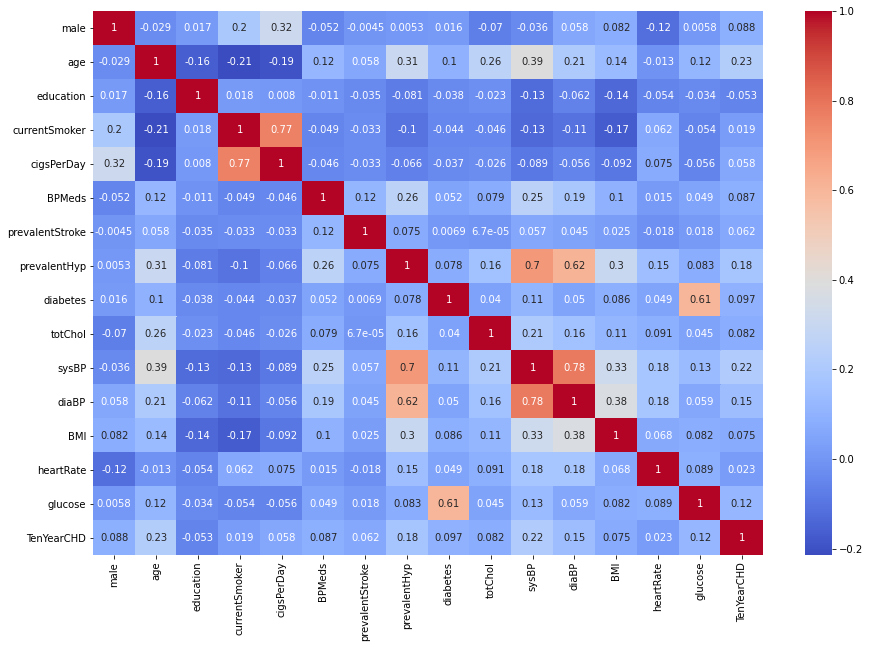

In [163]:
# I want to visualize the correlation matrix better using seaborn
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sb.heatmap(corrMatrix,annot=True, cmap="coolwarm")
plt.show()
# lowest idicators for CHD include currentSmoker, heartRate, and BMI
# Highest indicators include age, sysBP, and prevalentHyp

In [164]:
# Drop any columns?
# All the information seems to be relevant to predicting CVD but education.
# I originally thought about keeping education. This is because I was thinking that having a higher level of education could mean that
# the individual is more educated on living a healthy lifestyle, but realized that this is probably not the best predictor for our model.
# Dropping Education

del df['education']

In [165]:
# checking to see if education was deleted
df.head(20)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.000000,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.000000,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.000000,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.000000,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.000000,0


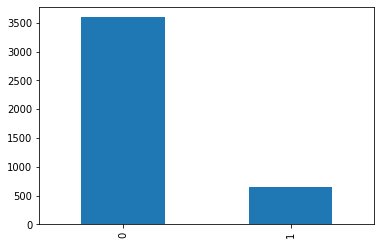

In [166]:
# Visualize the ten year CHD
pd.value_counts(df['TenYearCHD']).plot.bar()
# a majority of the data set did not have the risk of developing chd

0    2144
1    2094
Name: currentSmoker, dtype: int64

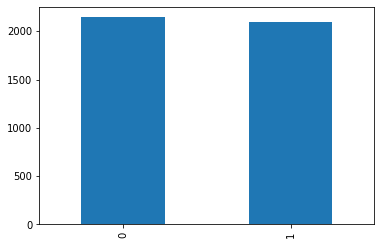

In [167]:
# Visualize how many are current smokers
pd.value_counts(df['currentSmoker']).plot.bar()
df['currentSmoker'].value_counts()

# split pretty evenly

In [168]:
# Since the World Health Organization says that smoking can lead to heart disease, I was curious to see how many cigarettes these people smoked.
df['cigsPerDay'].value_counts()
# I noticed that 70 is a lot, especially in a day. Could this be a mistake? 

0.000000     2144
20.000000     734
30.000000     217
15.000000     210
10.000000     143
9.000000      130
5.000000      121
3.000000      100
40.000000      80
1.000000       67
43.000000      56
25.000000      55
9.003089       29
35.000000      22
6.000000       18
2.000000       18
7.000000       12
8.000000       11
60.000000      11
4.000000        9
18.000000       8
17.000000       7
50.000000       6
23.000000       6
11.000000       5
45.000000       3
16.000000       3
13.000000       3
12.000000       3
14.000000       2
19.000000       2
70.000000       1
38.000000       1
29.000000       1
Name: cigsPerDay, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30bb6b2050>,
      dtype=object)

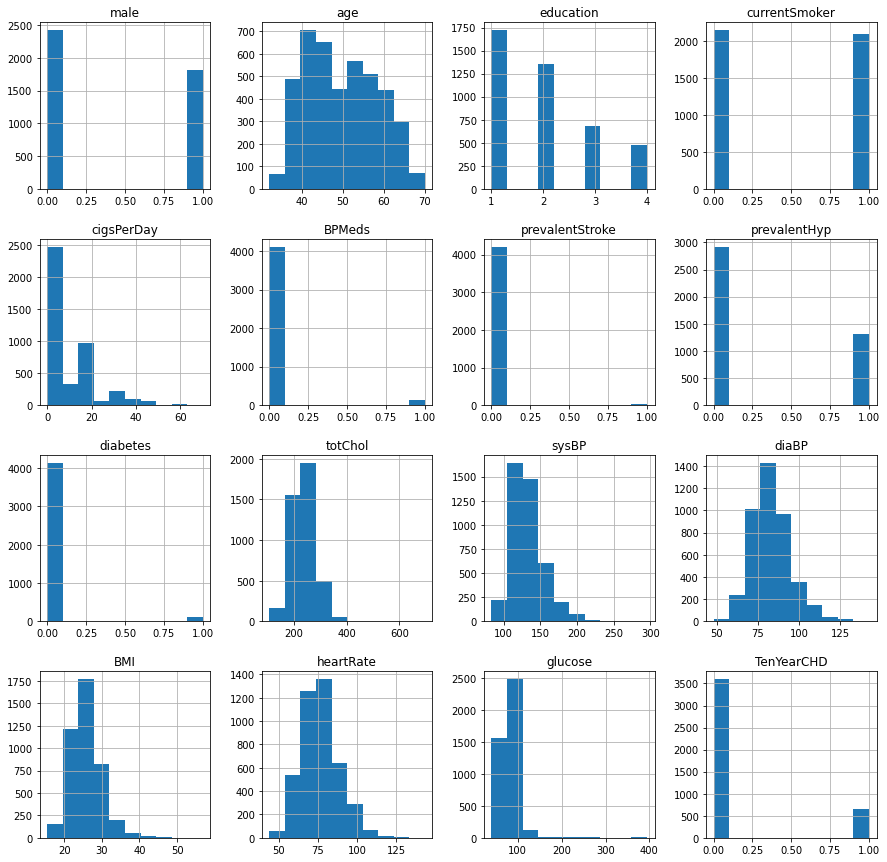

In [198]:
# Histograms to show distribution for each column
df.hist(figsize=(15,15))

In [170]:
# First I will be using logistic regression to model the data
# Split data into training and test set
X = df.iloc[:,:14]
y = df.iloc[:,14]

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2966, 14)
(2966,)
(1272, 14)
(1272,)


In [171]:
# Fit your training data to a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

logReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[[1079    5]
 [ 183    5]]
Accuracy: 0.8522012578616353


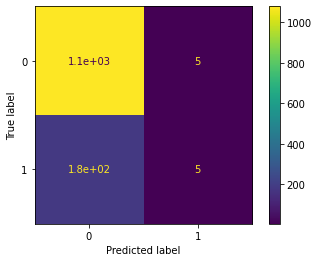

In [172]:
# make predictions
y_pred = logReg.predict(X_test)

# evaluate the performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X,y)
dummy_clf.score(X, y)

# Confusion Matrix
metrics.plot_confusion_matrix(logReg, X_test, y_test)

In [220]:
# Next I will try using decision tree
# I will be using the same traning and testing set from the Logistic Regression Model
X_traindt, X_testdt, y_traindt, y_testdt = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

dt = DecisionTreeClassifier(criterion='entropy', max_depth=7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [222]:
# Predict
y_pred = dt.predict(X_testdt)

[[1044   40]
 [ 180    8]]
Accuracy = 0.8270440251572327


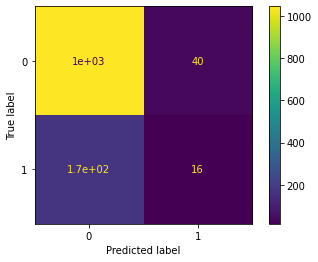

In [221]:
cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt

metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

In [215]:
# From the two models Logistic Regression and Decision Trees, it appears that Logistic Regression had the higher baseline accuracy, but to prevent overfitting,
# I decided to use the Decision Trees model and further simplify it.  

In [223]:
# Baseline Classification Accuracy for X_train
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)

print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.8522012578616353


In [224]:
# Bootstrap Sampling
def create_bootstrap_sample(df):
    return df.sample(n= df.shape[0], replace = True)

bootstrap_sample = create_bootstrap_sample(X_train)

print('Number of rows should be the same:')
print('Number of rows in X_train:  ', X_train.shape[0])
print('Number of rows in bootstrap:', create_bootstrap_sample(X_train).shape[0])

print(bootstrap_sample)

Number of rows should be the same:
Number of rows in X_train:   2966
Number of rows in bootstrap: 2966
      male  age  currentSmoker  cigsPerDay  ...  diaBP    BMI  heartRate  glucose
4225     1   45              1        43.0  ...   85.0  24.24       83.0    105.0
3426     0   45              0         0.0  ...   80.0  24.39       75.0     80.0
686      1   48              0         0.0  ...   81.0  24.87       76.0     76.0
3152     0   38              1         5.0  ...   73.0  20.73       85.0     72.0
232      1   48              0         0.0  ...   79.0  28.62       85.0    100.0
...    ...  ...            ...         ...  ...    ...    ...        ...      ...
3564     1   40              0         0.0  ...   85.0  30.80       75.0     85.0
988      1   42              0         0.0  ...   88.0  23.61       75.0     78.0
3817     1   47              1        20.0  ...   93.0  28.50       68.0    332.0
3991     1   39              1         1.0  ...   84.0  21.01       60.0    1

In [225]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_bagging = BaggingClassifier(random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy = ', acc_bagging)

# This lowered Accuracy

 Accuracy =  0.835691823899371


In [226]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
print('Classification Report:\n')
print(classification_report(y_test, pred_bagging))

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1084
           1       0.29      0.08      0.13       188

    accuracy                           0.84      1272
   macro avg       0.58      0.52      0.52      1272
weighted avg       0.77      0.84      0.79      1272



In [227]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)

print(' Accuracy = ', accuracy_score(y_test, predict_rf))


 Accuracy =  0.8537735849056604


In [228]:
# Top 5 features for the Random Forest
features = X_train.columns
feature_importance = model_rf.feature_importances_
importance = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).nlargest(5, 'Importance')
print(importance)

    Feature  Importance
11      BMI    0.145464
9     sysBP    0.142196
8   totChol    0.129764
13  glucose    0.127895
1       age    0.121750


In [229]:
# Out of Bag Evaluation
from sklearn.ensemble import RandomForestClassifier

model_rf_oob = RandomForestClassifier(n_estimators=100, max_features=7, oob_score=True, random_state=42).fit(X_train, y_train)
oob_score = round(model_rf_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_oob.predict(X_test)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('OOB Score:\t\t\t', oob_score)
print('Testing Accuracy:\t\t', acc_oob)
print('Acc. Difference:\t\t', diff_oob)

OOB Score:			 0.8449
Testing Accuracy:		 0.8538
Acc. Difference:		 0.0089


In [230]:
# AdaBoost
base_est = DecisionTreeClassifier (max_depth =4)
ada_boost1 = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost1.fit(X_train, y_train)
adaboost_predict = ada_boost1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, adaboost_predict))

Accuracy: 0.8325471698113207


In [231]:
# Top 5 features for AdaBoost
ada_features = X_train.columns
ada_feature_importance = ada_boost1.feature_importances_
ada_importance = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).nlargest(5, 'Importance')
print(ada_importance)

    Feature  Importance
11      BMI    0.145464
9     sysBP    0.142196
8   totChol    0.129764
13  glucose    0.127895
1       age    0.121750


In [232]:
# Gradient Boosted Trees (GBT)
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
recall_gbc = round(recall_score(y_test, gbc_pred),4)
precision_gbc = round(precision_score(y_test, gbc_pred),4)

print('Recall :\t {}'.format(recall_gbc))
print('Precision :\t {}:'.format(precision_gbc))

print("Accuracy:", accuracy_score(y_test, gbc_pred))

Recall :	 0.0904
Precision :	 0.5152:
Accuracy: 0.8529874213836478


In [233]:
# Feature Importance
feature_importances = model_rf.feature_importances_
features = X_train.columns
df2 = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest
print(df2)

<bound method DataFrame.nlargest of            features  importance
0              male    0.019185
1               age    0.121750
2     currentSmoker    0.009759
3        cigsPerDay    0.053895
4            BPMeds    0.010533
5   prevalentStroke    0.003813
6      prevalentHyp    0.014061
7          diabetes    0.002293
8           totChol    0.129764
9             sysBP    0.142196
10            diaBP    0.120152
11              BMI    0.145464
12        heartRate    0.099240
13          glucose    0.127895>


In [234]:
rfClf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=4)
svmClf = SVC(probability=True, random_state=0)
logClf = LogisticRegression(random_state=0)

clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf)], voting='soft') 
clf2.fit(X_train, y_train)

clf2_pred = clf2.predict(X_test)
precision_voting = precision_score(y_test, clf2_pred)
print('Accuracy score', accuracy_score(y_test, clf2_pred))

Accuracy score 0.8514150943396226


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


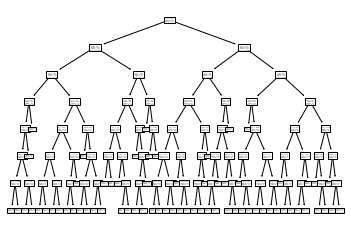

In [235]:
# Visualizing the Tree and Saving it
from sklearn import tree

plt.figure()
heartTree = tree.plot_tree(dt)
plt.savefig('heart.png')
plt.show()
